<a href="https://colab.research.google.com/github/nguyenhaimd/nooksff/blob/main/DownloadYahooFFSingleLeagueData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a jupyter notebook hosted in google colab.

This is simply long Python script that is broken up into sections that can be run individually.  You need to every gray box of commands, in order. You can run it by pressing shift+enter while you have the box selected.  Start by running the imports section.

# Imports

In [ ]:
!pip install xmltodict
import requests
import xmltodict
from datetime import datetime
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import pprint
import ast
import json
pp = pprint.PrettyPrinter(indent=2)

## Get a token
Go to this website, login with Yahoo, and then copy the Access Token
https://lemon-dune-0cd4b231e.azurestaticapps.net/.

Paste the Authentication Toekn in the belown command, replacing the existing token.

In [ ]:
token = "82RDHZWc4B2zwtwHIN.69gP2EFhucTokh0B68c2MYaOLuuDsRHyRecxm4l9OmJEc9ge.Z6LCek12dCRW4O3Q1JDgfGwgToYW2biTUzCQ2mWSqhHMC2b2SlSBeIu3em2VRPFXJO6DElhM67nVjhkQE2_OFfgzl8VCSK76XeQjRNvAbXYDh2EolIxa3vmbwEAwt4dtpw5xfipgVESXIJdnq55PENtkEwKscnQbHLgMpEEWl.ZBQx0hfcYSHXvUo.hZ.iMJI8Peu9ndKA9zAMufnDPV3.KoKoX9PvL2Hr44JXFAEQGLazYhlaKBi2xJmpGBoZ.6wbTz2gPccJTqmwJk1AbWv3qj7dnuqS6WUjSdQX4MZOmAXRUknInUjmZAqmz_hR3fcm8f5BYYoK1uj.h1y8DqzL6WOrjIxXYP_vpGMWWsebbRDswKPDX65NcaMnB31gbYuk.SNTo9RY6kbnW3eSHOX2fe1b9QI1Q3EYsp3URNv.GXbcBAED4byXWa.EkJcQF_B.TVDT_dpyBwQ3jzuCPrknfzvGiQ0T5WV8FHkGonKwGAQo.V8QbmXI2rj.9FeHhv6FNQQ7BC_F7LUXQWOEThe72HYnQBCzkmCcAK7qG28bAQSQUiALam7_y4XIKQ7WA2OKyYDtPu6w9TWD7ec7GfVgStkicnhsU2JN4XxbGBaQWq0teMMRwWpeoc5uTw8JLZ4wQmtI4lAI0D3wk13tuqy.TC9mcAmTkOKmyfMOUEmfjVCPTlGsXhE25qMHD1CQjAZRXVW0G1qCNsR8HRmxbGgpTLk.J2YLAGGFkq78ARYRKyoS4y5y3U1WBYI1sr8aSV6e.auBGQXDjNNSxl9QXVOX82MxGPvxsWQ3Nsqn34Mo19N8ZwDkq8ATk0UZXiyvFxddc5Ll.YPxRab27APo7wzsoh1w--"
authorization = "Bearer " + token
headers = {'Authorization': authorization}

## Get League Data for Signed in User

In [ ]:
uri = "https://fantasysports.yahooapis.com/fantasy/v2/users;use_login=1/games/leagues"
r = requests.get(uri, headers=headers)
pp.pprint(r)
leagues_content = xmltodict.parse(r.text)

<Response [200]>


In [ ]:
games = leagues_content["fantasy_content"]["users"]["user"]["games"]["game"]
league_dicts = []
for game in games:
    if  "leagues" in game and game["leagues"] != None:
        game_leagues = game["leagues"]["league"]
        if not isinstance(game_leagues, list):
            game_leagues = [game_leagues]
        for league in game_leagues:
            league_dict = {
                "league_key": league["league_key"],
                "name": league["name"],
                "game_code": league["game_code"],
                "season": league["season"],
                "num_teams": league["num_teams"]
            }
            league_dicts.append(league_dict)
leagues_df = pd.DataFrame(league_dicts,
                     columns=['league_key', 'name', 'game_code','season','num_teams'])
leagues_df

,league_key,name,game_code,season,num_teams
0,222.l.498135,Johnny Bravo,nfl,2009,12
1,242.l.54796,thug life,nfl,2010,12
2,257.l.37493,Think with your dipstick,nfl,2011,10
3,273.l.11763,RIght in the jejunum,nfl,2012,10
4,314.l.72103,Homies in my backpack,nfl,2013,10
5,331.l.35354,Chyea In Da Buildin,nfl,2014,10
6,348.l.88412,Chyea In Da Buildin,nfl,2015,10
7,359.l.62508,Chyea In Da Buildin,nfl,2016,10
8,371.l.120246,Chyea In Da Buildin,nfl,2017,10
9,380.l.709344,Chyea In Da Buildin,nfl,2018,10


Choose a single league key from above copy it and paste in the below script, replacing the current league key.  The league key you choose is the league whose data you're pulling.

In [ ]:
league_key = "423.l.77275"
season = leagues_df[leagues_df["league_key"] == league_key]["season"].values[0]
file_suffix = season

## Get League Settings

That's all the input this needs from you.  The league_key was the last value you needed to set.  So now, you could run the rest of the lines by selecting "Runtime"->"Run after" from the top menu 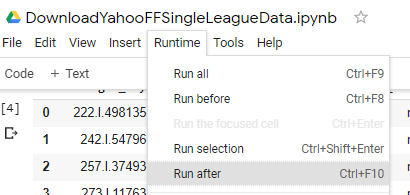

In [ ]:
uri = f"https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys={league_key}/settings"
r = requests.get(uri, headers=headers)
pp.pprint(r)
settings_content = xmltodict.parse(r.text)

<Response [200]>


In [ ]:
stat_map = {}
for stat in settings_content["fantasy_content"]["leagues"]["league"]["settings"]["stat_categories"]["stats"]["stat"]:
    stat_map[stat['stat_id']] = stat['name']

In [ ]:
league_settings = {}
playoffsStartWeek = settings_content['fantasy_content']['leagues']['league']['settings']["playoff_start_week"]
league_settings["playoff_startweek"] = playoffsStartWeek
positions = []
for position in settings_content['fantasy_content']['leagues']['league']['settings']['roster_positions']['roster_position']:
    for i in range(0,int(position['count'])):
        positions.append(position['position'])
league_settings["positions"] = positions

In [ ]:
with open(f'league_settings_{file_suffix}.json', 'w') as f:
    json.dump(league_settings, f)

## Get Teams Data

In [ ]:
uri = f"https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys={league_key}/standings"
r = requests.get(uri, headers=headers)
pp.pprint(r)
teams_content = xmltodict.parse(r.text)

<Response [200]>


In [ ]:
league = teams_content["fantasy_content"]["leagues"]["league"]
start_date = datetime.strptime(league["start_date"], '%Y-%m-%d')
start_week = int(league["start_week"])
end_week = int(league["end_week"]) # could use current week as end if mid year

team_dicts = []
for team in league["standings"]["teams"]["team"]:
    manager = team["managers"]["manager"]
    if isinstance(manager, list):
        manager = manager[0]
    team_dict = {
        "name": team["name"],
        "team_key": team["team_key"],
        "number_of_moves": int(team["number_of_moves"]),
        "number_of_trades": int(team["number_of_trades"]),
        "clinched_playoffs": "clinched_playoffs" in team and team["clinched_playoffs"] == "1",
        "manager_name": manager["nickname"],
        "division_id": team["division_id"] if 'division_id' in team else None,
        "draft_grade": team["draft_grade"] if "draft_grade" in team else None,
        "rank": int(team["team_standings"]["rank"]),
        "points_for": float(team["team_standings"]["points_for"]),
        "points_against": float(team["team_standings"]["points_against"]),
        "wins": int(team["team_standings"]["outcome_totals"]["wins"]),
        "losses": int(team["team_standings"]["outcome_totals"]["losses"]),
    }
    team_dicts.append(team_dict)
teams_df = pd.DataFrame(team_dicts)

In [ ]:
teams_df

,name,team_key,number_of_moves,number_of_trades,clinched_playoffs,manager_name,division_id,draft_grade,rank,points_for,points_against,wins,losses
0,Historic Shi Tpa Town,423.l.77275.t.1,31,1,True,Miccyd,1,A+,1,1917.78,1884.66,9,5
1,Kenneth Walker Sr,423.l.77275.t.9,33,0,True,Hagerty,2,D-,2,1876.84,1694.33,10,4
2,Bobby Flay,423.l.77275.t.8,57,0,True,Matt M,2,B-,3,1990.95,1857.71,8,6
3,Bottom Bitches,423.l.77275.t.3,45,0,True,Justin B,2,C-,4,1993.72,1944.27,8,6
4,Chef John,423.l.77275.t.10,18,1,True,Chris A,2,A-,5,1883.20,1871.82,8,6
5,Guy Fieri,423.l.77275.t.5,25,0,True,Sam,2,A-,6,1936.28,1938.52,7,7
6,a pimp named slickback,423.l.77275.t.6,28,0,False,J Remedy,1,D-,7,1586.87,1864.68,4,10
7,The Jagaloons,423.l.77275.t.2,20,0,False,Greg A,1,C-,8,1775.80,1800.20,5,9
8,The Slim Reapers,423.l.77275.t.7,25,0,False,Simon Kim,1,B,9,1793.40,1836.48,5,9
9,Ferrari Cake,423.l.77275.t.4,74,0,False,Robert,1,D,10,1792.38,1854.55,6,8


In [ ]:
def get_nickname(team_key):
    return teams_df[teams_df["team_key"] == team_key]["manager_name"].values[0]

In [ ]:
teams_df.to_csv(f"teams_{file_suffix}.csv", index=False)

## Get Player Data
1. Get Rosters
2. Get Player Stats
3. Merge info

In [ ]:
team_keys = ",".join(teams_df["team_key"])
baseUri = f"https://fantasysports.yahooapis.com/fantasy/v2/teams;team_keys={team_keys}/roster"
roster_content_list = []
for i in range(start_week, end_week + 1):
    uri = baseUri + ";week=" + str(i)
    r = requests.get(uri, headers=headers)
    pp.pprint(r)
    roster_content = xmltodict.parse(r.text)
    roster_content_list.append(roster_content)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [ ]:
player_dicts = []
for roster_content in roster_content_list:
    for team in roster_content["fantasy_content"]["teams"]["team"]:
        team_key = team["team_key"]
        week = team["roster"]["week"]
        for player in team["roster"]["players"]["player"]:
            player_dict = {
                "player_key": player["player_key"],
                "name": player["name"]["full"],
                "position": player["primary_position"],
                "week": int(player["selected_position"]["week"]),
                "started": player["selected_position"]['position'] == player["primary_position"] or player["selected_position"]['is_flex'] == '1',
                "team_key": team_key,
                "manager_name": get_nickname(team_key)
            }
            player_dicts.append(player_dict)
players_df = pd.DataFrame(player_dicts)
players_df.head(5)

,player_key,name,position,week,started,team_key,manager_name
0,423.p.30123,Patrick Mahomes,QB,1,True,423.l.77275.t.1,Miccyd
1,423.p.30125,Deshaun Watson,QB,1,True,423.l.77275.t.1,Miccyd
2,423.p.32687,CeeDee Lamb,WR,1,True,423.l.77275.t.1,Miccyd
3,423.p.33966,Chris Olave,WR,1,True,423.l.77275.t.1,Miccyd
4,423.p.33394,Jaylen Waddle,WR,1,True,423.l.77275.t.1,Miccyd


In [ ]:
import time
player_keys = players_df.player_key.unique()
player_stats_contents = []
for week in range(start_week, end_week + 1):
    # max page size is 25
    print(f"downloading week {week}")
    for i in range(0,len(player_keys),25):
        player_keys_subset_str = ",".join(player_keys[i:i+25])
        uri = f"https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys={league_key}/players;player_keys={player_keys_subset_str}/stats;type=week;week={week}"
        r = requests.get(uri, headers=headers)
        pp.pprint(r)
        if r.status_code != 200:
          print(uri)
        # sleep for 300 ms
        time.sleep(0.5)
        player_stats_content = xmltodict.parse(r.text)
        player_stats_contents.append(player_stats_content)

downloading week 1
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
downloading week 2
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
downloading week 3
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
downloading week 4
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
downloading week 5
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Res

In [ ]:
player_stats_dicts = []
for player_stats_content in player_stats_contents:
    try:
      for player_stats in player_stats_content["fantasy_content"]["leagues"]["league"]["players"]["player"]:
        player_stats_dict = {
            'player_key': player_stats["player_key"],
            'week': int(player_stats["player_stats"]["week"]),
            'points': float(player_stats["player_points"]["total"]),
            'name': player_stats["name"]["full"]
        }
        for stat in player_stats["player_stats"]["stats"]["stat"]:
            stat_name = stat_map[stat['stat_id']]
            stat_value = ast.literal_eval(stat['value'])
            player_stats_dict[stat_name] = stat_value
        player_stats_dicts.append(player_stats_dict)
    except:
      # ignore error
      pass
player_stats_df = pd.DataFrame(player_stats_dicts)
player_stats_df.head(5)

,player_key,week,points,name,Passing Yards,Passing Touchdowns,Interceptions,Rushing Attempts,Rushing Yards,Rushing Touchdowns,...,Kickoff and Punt Return Touchdowns,4th Down Stops,Points Allowed 0 points,Points Allowed 1-6 points,Points Allowed 7-13 points,Points Allowed 14-20 points,Points Allowed 21-27 points,Points Allowed 28-34 points,Points Allowed 35+ points,Extra Point Returned
0,423.p.30123,1,16.96,Patrick Mahomes,226.0,2.0,1.0,6.0,45.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,423.p.30125,1,18.90,Deshaun Watson,154.0,1.0,1.0,5.0,45.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,423.p.32687,1,9.70,CeeDee Lamb,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,423.p.33966,1,17.20,Chris Olave,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,423.p.33394,1,9.80,Jaylen Waddle,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
players_df = pd.merge(players_df, player_stats_df, how='outer', left_on=['player_key','week', 'name'], right_on = ['player_key', 'week', 'name'])
players_df.head(5)

,player_key,name,position,week,started,team_key,manager_name,points,Passing Yards,Passing Touchdowns,...,Kickoff and Punt Return Touchdowns,4th Down Stops,Points Allowed 0 points,Points Allowed 1-6 points,Points Allowed 7-13 points,Points Allowed 14-20 points,Points Allowed 21-27 points,Points Allowed 28-34 points,Points Allowed 35+ points,Extra Point Returned
0,423.p.30123,Patrick Mahomes,QB,1,True,423.l.77275.t.1,Miccyd,16.96,226.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,423.p.30125,Deshaun Watson,QB,1,True,423.l.77275.t.1,Miccyd,18.90,154.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,423.p.32687,CeeDee Lamb,WR,1,True,423.l.77275.t.1,Miccyd,9.70,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,423.p.33966,Chris Olave,WR,1,True,423.l.77275.t.1,Miccyd,17.20,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,423.p.33394,Jaylen Waddle,WR,1,True,423.l.77275.t.1,Miccyd,9.80,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
players_df.to_csv(f"players_{file_suffix}.csv", index=False)

## Get Trades

In [ ]:
uri = f"https://fantasysports.yahooapis.com/fantasy/v2/leagues;league_keys={league_key};out=transactions"
r = requests.get(uri, headers=headers)
pp.pprint(r)
trades_content = xmltodict.parse(r.text)

<Response [200]>


In [ ]:
trades = [trade for trade in trades_content["fantasy_content"]["leagues"]["league"]["transactions"]["transaction"] if trade["type"] == "trade"]
trade_dicts = []

for trade in trades:
    trader_player_keys_received = []
    tradee_player_keys_received = []
    trader_player_names_received = []
    tradee_player_names_received = []
    trader_picks_received = []
    tradee_picks_received = []
    trader_team_key = trade["trader_team_key"]
    if "players" in trade:
        players = trade["players"]["player"]
        # single instance if only one player traded
        if not isinstance(players, list):
            players = [players]
        for player in players:
            name = player["name"]["full"]
            player_key = player["player_key"]
            if player["transaction_data"]["destination_team_key"] == trader_team_key:
                trader_player_names_received.append(name)
                trader_player_keys_received.append(player_key)
            else:
                tradee_player_names_received.append(name)
                tradee_player_keys_received.append(player_key)
    if "picks" in trade:
        for pick in trade["picks"]["pick"]:
            pick_round = int(pick["round"])
            if pick["destination_team_key"] == trader_team_key:
                trader_picks_received.append(pick_round)
            else:
                tradee_picks_received.append(pick_round)
    timestamp = int(trade["timestamp"])
    date = datetime.fromtimestamp(timestamp)
    delta = date - start_date
    week_enacted = delta.days // 7
    trade_dict = {
        "trader_team_key": trader_team_key,
        "trader_nickname": get_nickname(trader_team_key),
        "tradee_team_key": trade["tradee_team_key"],
        "tradee_nickname": get_nickname(trade["tradee_team_key"]),
        "trader_player_keys_received": trader_player_keys_received,
        "trader_player_names_received": trader_player_names_received,
        "tradee_player_keys_received": tradee_player_keys_received,
        "tradee_player_names_received": tradee_player_names_received,
        "trader_picks_received": trader_picks_received,
        "tradee_picks_received": tradee_picks_received,
        "week_enacted": week_enacted,
        "date": date
    }
    trade_dicts.append(trade_dict)
trades_df = pd.DataFrame(trade_dicts)
trades_df


,trader_team_key,trader_nickname,tradee_team_key,tradee_nickname,trader_player_keys_received,trader_player_names_received,tradee_player_keys_received,tradee_player_names_received,trader_picks_received,tradee_picks_received,week_enacted,date
0,423.l.77275.t.10,Chris A,423.l.77275.t.1,Miccyd,"[423.p.33508, 423.p.32687]","[Rhamondre Stevenson, CeeDee Lamb]","[423.p.32695, 423.p.33991]","[Brandon Aiyuk, Breece Hall]",[],[],7,2023-10-26 03:12:03


In [ ]:
trades_df.to_csv(f"trades_{file_suffix}.csv", index=False)

In [ ]:
add_drops = [transaction for transaction in trades_content["fantasy_content"]["leagues"]["league"]["transactions"]["transaction"] if transaction["type"] == "add/drop"]
add_drop_dicts = []

for add_drop in add_drops:
    player_keys_added = []
    player_keys_dropped = []
    player_names_added = []
    player_names_dropped = []
    manager_team_key = None
    if "players" in add_drop:
        players = add_drop["players"]["player"]
        # single instance if only one player traded
        if not isinstance(players, list):
            players = [players]
        for player in players:
            name = player["name"]["full"]
            player_key = player["player_key"]
            if player["transaction_data"]["type"] == "add":
                player_names_added.append(name)
                player_keys_added.append(player_key)
                if manager_team_key == None:
                    manager_team_key = player["transaction_data"]["destination_team_key"]
            else:
                player_names_dropped.append(name)
                player_keys_dropped.append(player_key)
    timestamp = int(add_drop["timestamp"])
    date = datetime.fromtimestamp(timestamp)
    delta = date - start_date
    week_enacted = delta.days // 7
    add_drop_dict = {
        "manager_team_key": manager_team_key,
        "manager_nickname": get_nickname(manager_team_key),
        "player_keys_added": player_keys_added,
        "player_names_added": player_names_added,
        "player_keys_dropped": player_keys_dropped,
        "player_names_dropped": player_names_dropped,
        "week_enacted": week_enacted,
        "date": date
    }
    add_drop_dicts.append(add_drop_dict)
add_drop_df = pd.DataFrame(add_drop_dicts)
add_drop_df


,manager_team_key,manager_nickname,player_keys_added,player_names_added,player_keys_dropped,player_names_dropped,week_enacted,date
0,423.l.77275.t.8,Matt M,[423.p.100013],[Las Vegas],[423.p.100011],[Indianapolis],16,2023-12-31 16:13:44
1,423.l.77275.t.1,Miccyd,[423.p.31998],[Easton Stick],[423.p.100020],[New York],16,2023-12-30 17:08:01
2,423.l.77275.t.9,Hagerty,[423.p.30563],[Nick Mullens],[423.p.33971],[Jahan Dotson],16,2023-12-30 08:13:16
3,423.l.77275.t.6,J Remedy,[423.p.33605],[Khalil Herbert],[423.p.34112],[Jerome Ford],16,2023-12-30 00:26:38
4,423.l.77275.t.9,Hagerty,[423.p.40075],[Zach Charbonnet],[423.p.40126],[Josh Downs],16,2023-12-29 02:35:54
...,...,...,...,...,...,...,...,...
333,423.l.77275.t.9,Hagerty,[423.p.32727],[Van Jefferson],[423.p.32843],[Darnell Mooney],-1,2023-09-06 22:59:34
334,423.l.77275.t.9,Hagerty,[423.p.100007],[Denver],[423.p.100017],[New England],-1,2023-09-06 22:40:02
335,423.l.77275.t.4,Robert,[423.p.100030],[Jacksonville],[423.p.40243],[Zach Evans],-1,2023-09-06 02:13:00
336,423.l.77275.t.7,Simon Kim,[423.p.33422],[Elijah Moore],[423.p.30175],[JuJu Smith-Schuster],-1,2023-09-05 19:54:34


In [ ]:
add_drop_df.to_csv(f"add_drops_{file_suffix}.csv", index=False)

## Get Matchups

In [ ]:
team_keys = ",".join(teams_df["team_key"])
uri = f"https://fantasysports.yahooapis.com/fantasy/v2/teams;team_keys={team_keys}/matchups"
r = requests.get(uri, headers=headers)
pp.pprint(r)
matchups_content = xmltodict.parse(r.text)

<Response [200]>


In [ ]:
matchup_dicts = []
for team in matchups_content["fantasy_content"]["teams"]["team"]:
    for matchup in team["matchups"]["matchup"]:
        team_1 = matchup["teams"]["team"][0]
        matchup_dict = {
            "week": int(matchup['week']),
            "is_playoffs": matchup["is_playoffs"] == "1",
            "is_consolation": matchup["is_consolation"] == "1",
            "team_1_key": team_1["team_key"],
            "team_1_nickname": get_nickname(team_1["team_key"]),
            "team_1_points": float(team_1["team_points"]["total"]),
            "team_1_projected_points": float(team_1["team_projected_points"]["total"])
        }
        if matchup["teams"]["@count"] == "1":
            matchup_dict["is_bye"] = True
        else:
            matchup_dict["is_bye"] = False
            team_2 = matchup["teams"]["team"][1]
            matchup_dict["team_2_key"] = team_2["team_key"]
            matchup_dict["team_2_nickname"] = get_nickname(team_2["team_key"])
            matchup_dict["team_2_points"] = team_2["team_points"]["total"]
            matchup_dict["team_2_projected_points"] = team_2["team_projected_points"]["total"]
        matchup_dicts.append(matchup_dict)
matchups_df = pd.DataFrame(matchup_dicts)
matchups_df.head(5)

,week,is_playoffs,is_consolation,team_1_key,team_1_nickname,team_1_points,team_1_projected_points,is_bye,team_2_key,team_2_nickname,team_2_points,team_2_projected_points
0,1,False,False,423.l.77275.t.1,Miccyd,147.26,134.92,False,423.l.77275.t.2,Greg A,112.71,127.73
1,2,False,False,423.l.77275.t.1,Miccyd,139.62,130.84,False,423.l.77275.t.6,J Remedy,119.85,116.31
2,3,False,False,423.l.77275.t.1,Miccyd,115.53,132.63,False,423.l.77275.t.5,Sam,204.34,124.55
3,4,False,False,423.l.77275.t.1,Miccyd,101.99,129.36,False,423.l.77275.t.7,Simon Kim,158.27,132.00
4,5,False,False,423.l.77275.t.1,Miccyd,188.73,129.94,False,423.l.77275.t.10,Chris A,115.25,124.40


In [ ]:
matchups_df.to_csv(f"matchups_{file_suffix}.csv", index=False)

## Download files

Run the following script to download all files created from this notebook.  You'll need to give permission to your browser to download multiple files.  Put all files in a dedicated folder for ease of upload.



In [ ]:
from google.colab import files
files.download(f'players_{file_suffix}.csv')
files.download(f"teams_{file_suffix}.csv")
files.download(f"trades_{file_suffix}.csv")
files.download(f"add_drops_{file_suffix}.csv")
files.download(f"matchups_{file_suffix}.csv")
files.download(f"league_settings_{file_suffix}.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>